3090 - pth-gpu, kernel died

3090 - pth25gpu - OK

In [ ]:
# %run main.py

In [ ]:
%run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.0

Using device: cuda
GPU: NVIDIA GeForce RTX 3090
Random seeds set to 42

Loading dataset: CIFAR10
Files already downloaded and verified
Files already downloaded and verified


c:\Users\m.amintoosi\.conda\envs\pth25gpu\lib\site-packages\torch\utils\data\dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training with optimizer: Adam
Trainable parameters: 545,098


Epoch 1/20:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\training.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s] 
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 1.8112 | Train Acc: 34.09% | Test Loss: 1.4848 | Test Acc: 46.43% | Time: 124.09s


Epoch 2/20: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 2/20 | Train Loss: 1.4840 | Train Acc: 46.18% | Test Loss: 1.3011 | Test Acc: 54.67% | Time: 119.74s


Epoch 3/20: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s] 


Epoch 3/20 | Train Loss: 1.3504 | Train Acc: 51.17% | Test Loss: 1.1720 | Test Acc: 58.53% | Time: 121.71s


Epoch 4/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 4/20 | Train Loss: 1.2614 | Train Acc: 54.88% | Test Loss: 1.1117 | Test Acc: 60.73% | Time: 118.46s


Epoch 5/20: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s] 


Epoch 5/20 | Train Loss: 1.1956 | Train Acc: 57.12% | Test Loss: 1.0798 | Test Acc: 62.22% | Time: 122.36s


Epoch 6/20: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s] 


Epoch 6/20 | Train Loss: 1.1376 | Train Acc: 59.27% | Test Loss: 0.9911 | Test Acc: 65.62% | Time: 122.10s


Epoch 7/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 7/20 | Train Loss: 1.0912 | Train Acc: 61.07% | Test Loss: 0.9560 | Test Acc: 65.99% | Time: 118.39s


Epoch 8/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 8/20 | Train Loss: 1.0638 | Train Acc: 62.25% | Test Loss: 0.9086 | Test Acc: 68.59% | Time: 118.30s


Epoch 9/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 9/20 | Train Loss: 1.0293 | Train Acc: 63.46% | Test Loss: 0.8751 | Test Acc: 69.74% | Time: 118.64s


Epoch 10/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 10/20 | Train Loss: 1.0030 | Train Acc: 64.79% | Test Loss: 0.8972 | Test Acc: 68.75% | Time: 115.32s


Epoch 11/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 11/20 | Train Loss: 0.9893 | Train Acc: 65.02% | Test Loss: 0.8639 | Test Acc: 69.83% | Time: 115.32s


Epoch 12/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 12/20 | Train Loss: 0.9739 | Train Acc: 65.58% | Test Loss: 0.8355 | Test Acc: 70.97% | Time: 112.61s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 13/20 | Train Loss: 0.9486 | Train Acc: 66.50% | Test Loss: 0.8623 | Test Acc: 69.63% | Time: 113.49s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 0.9431 | Train Acc: 66.77% | Test Loss: 0.8321 | Test Acc: 71.26% | Time: 112.21s


Epoch 15/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 15/20 | Train Loss: 0.9243 | Train Acc: 67.32% | Test Loss: 0.8144 | Test Acc: 71.42% | Time: 119.03s


Epoch 16/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 16/20 | Train Loss: 0.9079 | Train Acc: 67.99% | Test Loss: 0.8493 | Test Acc: 70.61% | Time: 119.58s


Epoch 17/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 17/20 | Train Loss: 0.9044 | Train Acc: 67.98% | Test Loss: 0.7716 | Test Acc: 73.11% | Time: 120.51s


Epoch 18/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 18/20 | Train Loss: 0.8897 | Train Acc: 68.67% | Test Loss: 0.7697 | Test Acc: 72.96% | Time: 119.85s


Epoch 19/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 19/20 | Train Loss: 0.8682 | Train Acc: 69.16% | Test Loss: 0.7589 | Test Acc: 73.47% | Time: 119.05s


Epoch 20/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 20/20 | Train Loss: 0.8626 | Train Acc: 69.71% | Test Loss: 0.7518 | Test Acc: 73.82% | Time: 118.54s

Training with optimizer: SR-Adam (Conv-only, Adaptive)
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 1/20 | Train Loss: 1.8602 | Train Acc: 32.29% | Test Loss: 1.5032 | Test Acc: 46.23% | Time: 114.60s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 2/20 | Train Loss: 1.4942 | Train Acc: 45.70% | Test Loss: 1.2941 | Test Acc: 53.47% | Time: 114.18s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 3/20 | Train Loss: 1.3438 | Train Acc: 51.72% | Test Loss: 1.1449 | Test Acc: 59.33% | Time: 111.93s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/20 | Train Loss: 1.2494 | Train Acc: 55.30% | Test Loss: 1.0852 | Test Acc: 61.38% | Time: 113.34s


Epoch 5/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 5/20 | Train Loss: 1.1680 | Train Acc: 58.19% | Test Loss: 0.9893 | Test Acc: 65.25% | Time: 114.15s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 6/20 | Train Loss: 1.1034 | Train Acc: 60.67% | Test Loss: 0.9469 | Test Acc: 66.70% | Time: 112.68s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 7/20 | Train Loss: 1.0582 | Train Acc: 62.57% | Test Loss: 0.9467 | Test Acc: 66.21% | Time: 112.88s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 8/20 | Train Loss: 1.0286 | Train Acc: 63.66% | Test Loss: 0.8834 | Test Acc: 68.91% | Time: 113.84s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 9/20 | Train Loss: 0.9908 | Train Acc: 64.93% | Test Loss: 0.8616 | Test Acc: 69.68% | Time: 113.29s


Epoch 10/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 10/20 | Train Loss: 0.9649 | Train Acc: 65.78% | Test Loss: 0.8288 | Test Acc: 70.94% | Time: 118.05s


Epoch 11/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 11/20 | Train Loss: 0.9419 | Train Acc: 66.65% | Test Loss: 0.8265 | Test Acc: 70.93% | Time: 118.43s


Epoch 12/20: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 12/20 | Train Loss: 0.9242 | Train Acc: 67.51% | Test Loss: 0.8157 | Test Acc: 71.20% | Time: 120.30s


Epoch 13/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 13/20 | Train Loss: 0.9077 | Train Acc: 67.84% | Test Loss: 0.8029 | Test Acc: 71.90% | Time: 119.94s


Epoch 14/20: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 14/20 | Train Loss: 0.8918 | Train Acc: 68.84% | Test Loss: 0.7879 | Test Acc: 72.58% | Time: 119.65s


Epoch 15/20: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 15/20 | Train Loss: 0.8846 | Train Acc: 69.04% | Test Loss: 0.7807 | Test Acc: 72.84% | Time: 119.76s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 16/20 | Train Loss: 0.8764 | Train Acc: 69.27% | Test Loss: 0.7608 | Test Acc: 73.13% | Time: 113.11s


Epoch 17/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 17/20 | Train Loss: 0.8722 | Train Acc: 69.53% | Test Loss: 0.7616 | Test Acc: 73.38% | Time: 113.91s


Epoch 18/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 18/20 | Train Loss: 0.8506 | Train Acc: 70.40% | Test Loss: 0.7361 | Test Acc: 74.50% | Time: 113.67s


Epoch 19/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 19/20 | Train Loss: 0.8448 | Train Acc: 70.11% | Test Loss: 0.7672 | Test Acc: 73.01% | Time: 111.95s


Epoch 20/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 20/20 | Train Loss: 0.8266 | Train Acc: 70.77% | Test Loss: 0.7382 | Test Acc: 74.62% | Time: 120.13s
Results saved to results_CIFAR10_noise0.05\optimizer_comparison_CIFAR10_batch512_epochs20_noise0.05.xlsx
Config saved to results_CIFAR10_noise0.05\config.json
Plot saved to results_CIFAR10_noise0.05/optimizer_comparison.png


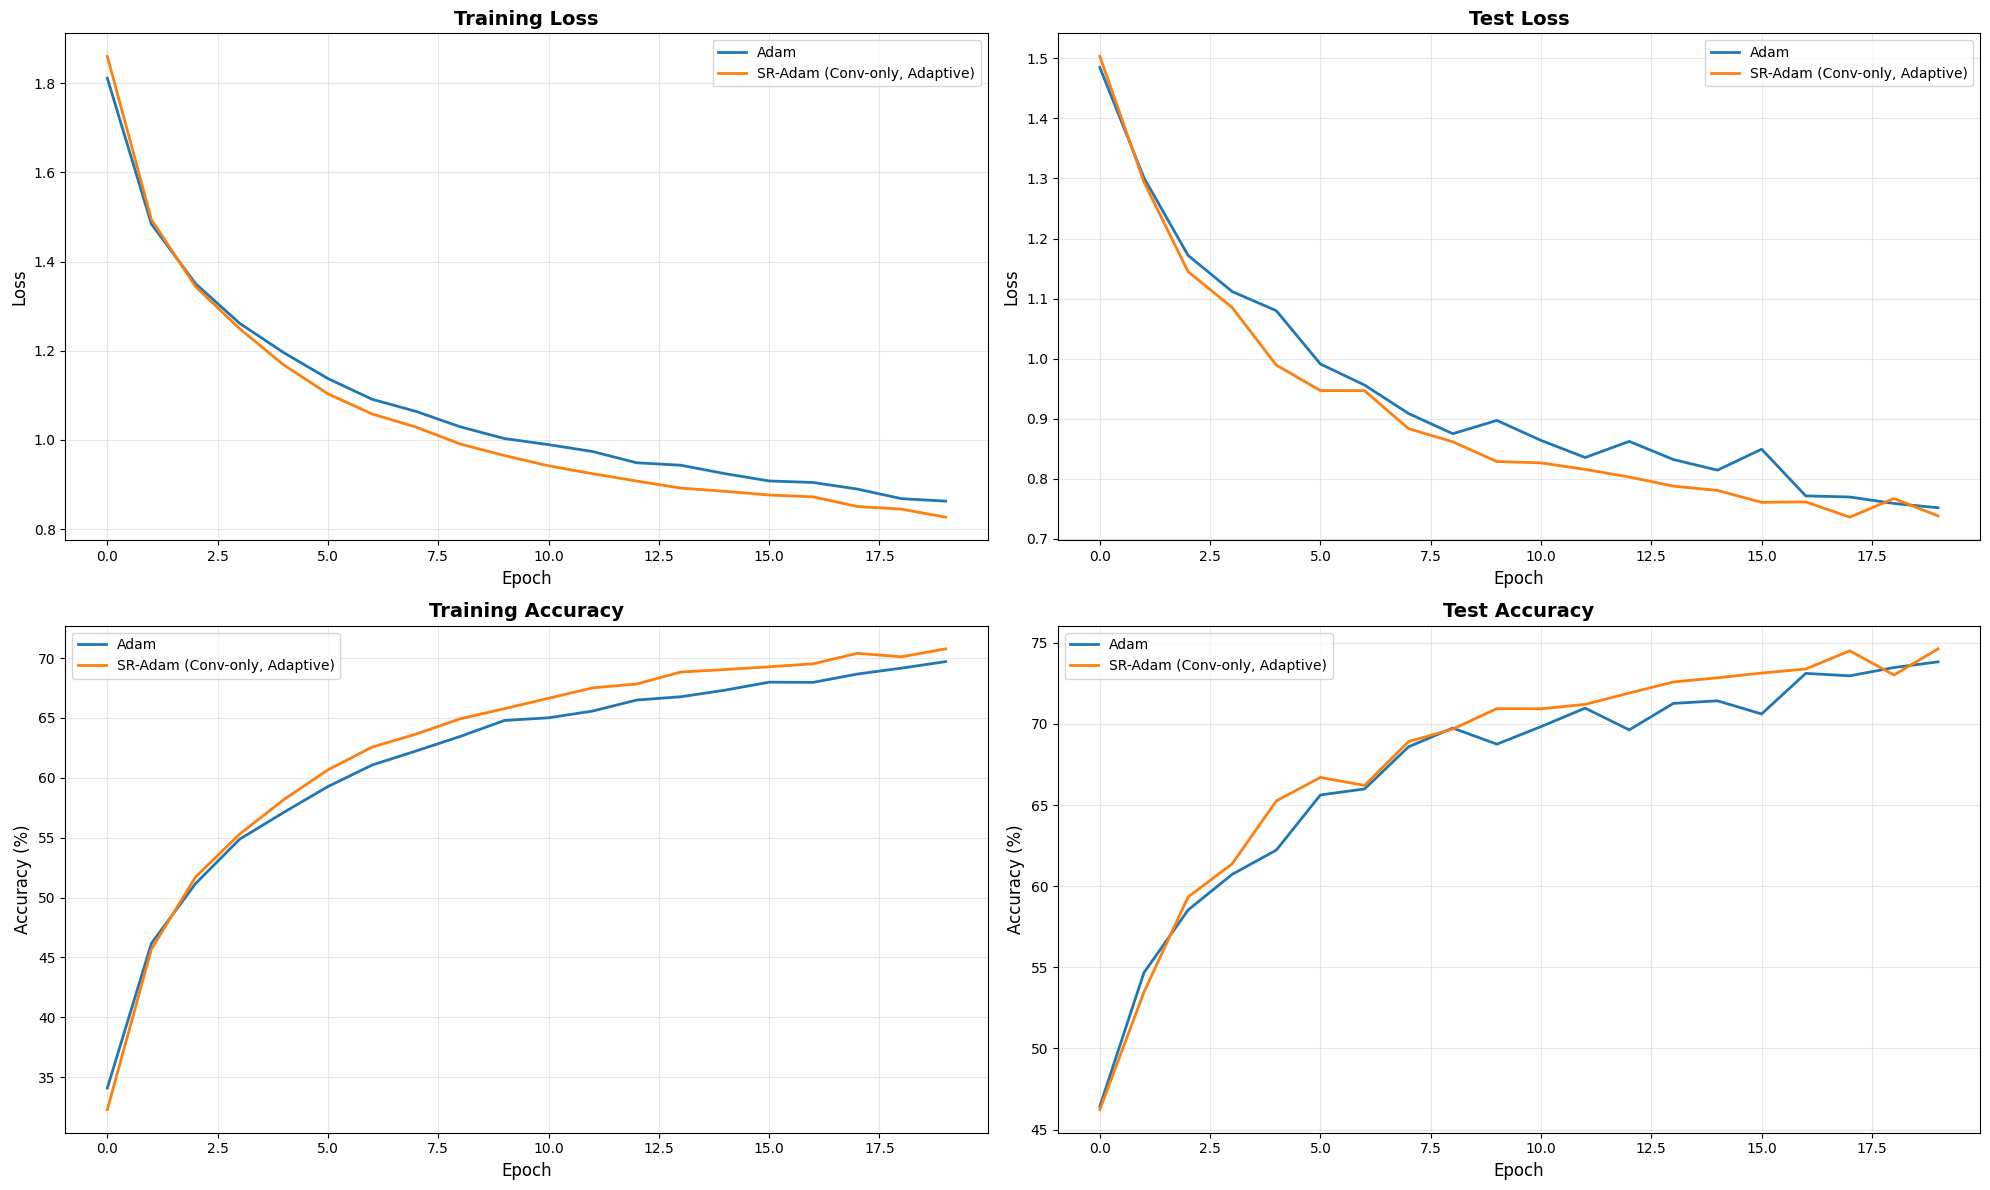


FINAL TEST ACCURACIES AND STATISTICS

Adam:
  Final Test Accuracy: 73.82%
  Best Test Accuracy:  73.82%
  Avg Epoch Time:      118.47s

SR-Adam (Conv-only, Adaptive):
  Final Test Accuracy: 74.62%
  Best Test Accuracy:  74.62%
  Avg Epoch Time:      115.49s



In [ ]:
python main.py \
  --dataset CIFAR10 \
  --batch_size 2048 \
  --num_epochs 20 \
  --num_runs 5 \
  --optimizers "adam|sradam"

In [ ]:
# %run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.1

In [ ]:
# %run main.py --dataset CIFAR100 --batch_size 512 --num_epochs 20 --noise 0.1